In [4]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
data

NameError: name 'data' is not defined

In [8]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

import datetime

import torch
import torch.nn as nn
from torch.autograd import Variable 

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [3]:
import matplotlib.image as img

In [4]:
Seoul = pd.read_csv("C:\\Users\\about\\OneDrive\\바탕 화면\\캡스톤\\data\\서울\\Seoul.csv", encoding = 'cp949')
Seoul.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
Seoul = Seoul.set_index('Date')
Seoul

,APT,APT_status,CCI,CPI,FD_rate,LAND,M2,M_rate
Date,,,,,,,,
2006년 1월,0.152165,0.053085,0.333333,0.000000,0.582996,0.879651,0.000000,0.626204
2006년 2월,0.101409,0.254665,0.344262,0.008380,0.595142,0.929720,0.003188,0.614644
2006년 3월,0.131638,0.481195,0.333333,0.019528,0.613360,1.000000,0.006649,0.591522
2006년 4월,0.080474,0.435268,0.295082,0.025139,0.625506,0.979789,0.009518,0.583815
2006년 5월,0.046977,0.433696,0.278689,0.027945,0.637652,0.993110,0.012843,0.581888
...,...,...,...,...,...,...,...,...
2020년 9월,0.861826,0.148206,0.475410,0.993933,0.036437,0.892283,0.950679,0.009634
2020년 10월,0.848652,0.128553,0.562842,0.976112,0.026316,0.887000,0.967802,0.015414
2020년 11월,0.939645,0.145310,0.639344,0.972699,0.016194,0.893891,0.981783,0.032755


In [4]:
#LAND값 제거 하지 말고 결측치 채우기
column_to_remove = 'LAND'
Seoul = Seoul.drop(column_to_remove, axis=1)
Seoul

,APT,APT_status,CCI,CPI,FD_rate,M2,M_rate
Date,,,,,,,
2006년 1월,0.152165,0.053085,0.333333,0.000000,0.582996,0.000000,0.626204
2006년 2월,0.101409,0.254665,0.344262,0.008380,0.595142,0.003188,0.614644
2006년 3월,0.131638,0.481195,0.333333,0.019528,0.613360,0.006649,0.591522
2006년 4월,0.080474,0.435268,0.295082,0.025139,0.625506,0.009518,0.583815
2006년 5월,0.046977,0.433696,0.278689,0.027945,0.637652,0.012843,0.581888
...,...,...,...,...,...,...,...
2020년 9월,0.861826,0.148206,0.475410,0.993933,0.036437,0.950679,0.009634
2020년 10월,0.848652,0.128553,0.562842,0.976112,0.026316,0.967802,0.015414
2020년 11월,0.939645,0.145310,0.639344,0.972699,0.016194,0.981783,0.032755


In [5]:
data = Seoul
data

,APT,APT_status,CCI,CPI,FD_rate,LAND,M2,M_rate
Date,,,,,,,,
2006년 1월,0.152165,0.053085,0.333333,0.000000,0.582996,0.879651,0.000000,0.626204
2006년 2월,0.101409,0.254665,0.344262,0.008380,0.595142,0.929720,0.003188,0.614644
2006년 3월,0.131638,0.481195,0.333333,0.019528,0.613360,1.000000,0.006649,0.591522
2006년 4월,0.080474,0.435268,0.295082,0.025139,0.625506,0.979789,0.009518,0.583815
2006년 5월,0.046977,0.433696,0.278689,0.027945,0.637652,0.993110,0.012843,0.581888
...,...,...,...,...,...,...,...,...
2020년 9월,0.861826,0.148206,0.475410,0.993933,0.036437,0.892283,0.950679,0.009634
2020년 10월,0.848652,0.128553,0.562842,0.976112,0.026316,0.887000,0.967802,0.015414
2020년 11월,0.939645,0.145310,0.639344,0.972699,0.016194,0.893891,0.981783,0.032755


In [6]:
#음의 상관관계 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

FD_rate = data[['FD_rate']]
M_rate = data[['M_rate']]

scaler = MinMaxScaler()

scaled_data1 = scaler.fit_transform(FD_rate)
scaled_data2 = scaler.fit_transform(M_rate)

FD_rate = 1 - scaled_data1
M_rate = 1 - scaled_data2

data[['FD_rate']] = FD_rate
data[['M_rate']] = M_rate
data

,APT,APT_status,CCI,CPI,FD_rate,LAND,M2,M_rate
Date,,,,,,,,
2006년 1월,0.152165,0.053085,0.333333,0.000000,0.417004,0.879651,0.000000,0.373796
2006년 2월,0.101409,0.254665,0.344262,0.008380,0.404858,0.929720,0.003188,0.385356
2006년 3월,0.131638,0.481195,0.333333,0.019528,0.386640,1.000000,0.006649,0.408478
2006년 4월,0.080474,0.435268,0.295082,0.025139,0.374494,0.979789,0.009518,0.416185
2006년 5월,0.046977,0.433696,0.278689,0.027945,0.362348,0.993110,0.012843,0.418112
...,...,...,...,...,...,...,...,...
2020년 9월,0.861826,0.148206,0.475410,0.993933,0.963563,0.892283,0.950679,0.990366
2020년 10월,0.848652,0.128553,0.562842,0.976112,0.973684,0.887000,0.967802,0.984586
2020년 11월,0.939645,0.145310,0.639344,0.972699,0.983806,0.893891,0.981783,0.967245


In [7]:
data

,APT,APT_status,CCI,CPI,FD_rate,LAND,M2,M_rate
Date,,,,,,,,
2006년 1월,0.152165,0.053085,0.333333,0.000000,0.417004,0.879651,0.000000,0.373796
2006년 2월,0.101409,0.254665,0.344262,0.008380,0.404858,0.929720,0.003188,0.385356
2006년 3월,0.131638,0.481195,0.333333,0.019528,0.386640,1.000000,0.006649,0.408478
2006년 4월,0.080474,0.435268,0.295082,0.025139,0.374494,0.979789,0.009518,0.416185
2006년 5월,0.046977,0.433696,0.278689,0.027945,0.362348,0.993110,0.012843,0.418112
...,...,...,...,...,...,...,...,...
2020년 9월,0.861826,0.148206,0.475410,0.993933,0.963563,0.892283,0.950679,0.990366
2020년 10월,0.848652,0.128553,0.562842,0.976112,0.973684,0.887000,0.967802,0.984586
2020년 11월,0.939645,0.145310,0.639344,0.972699,0.983806,0.893891,0.981783,0.967245


In [14]:
#보류
#교차검증
import pandas as pd
from sklearn.model_selection import KFold

# X와 y로 나누기
X = data.drop('APT', axis=1).values   # 'label' 컬럼을 제외한 나머지를 X로
y = data['APT'].values                 # 'label' 컬럼을 y로

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print(f"Fold {fold + 1} - Train: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples")

Fold 1 - Train: 144 samples, Test: 37 samples
Fold 2 - Train: 145 samples, Test: 36 samples
Fold 3 - Train: 145 samples, Test: 36 samples
Fold 4 - Train: 145 samples, Test: 36 samples
Fold 5 - Train: 145 samples, Test: 36 samples


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = data.drop('APT', axis=1).values   # 'label' 컬럼을 제외한 나머지를 X로
y = data['APT'].values                 # 'label' 컬럼을 y로

y = y.reshape(-1,1)

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

# Train Data
X_train = X_ss[:100, :]
X_test = X_ss[100:, :]

y_train = y_mm[:100, :]
y_test = y_mm[100:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (100, 7) (100, 1)
Testing Shape (81, 7) (81, 1)


In [9]:
X = torch.Tensor(X)
y = torch.Tensor(y)

# 데이터의 형태 확인
print("X의 형태:", X.shape)
print("y의 형태:", y.shape)

X의 형태: torch.Size([181, 6])
y의 형태: torch.Size([181, 1])


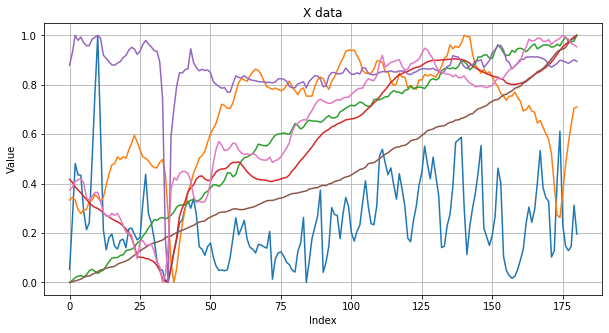

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.plot(X)  # 데이터를 그래프에 그림
plt.title("X data")  # 그래프 제목 설정
plt.xlabel("Index")  # x축 레이블 설정
plt.ylabel("Value")  # y축 레이블 설정
plt.grid(True)  # 격자 표시
plt.show() 

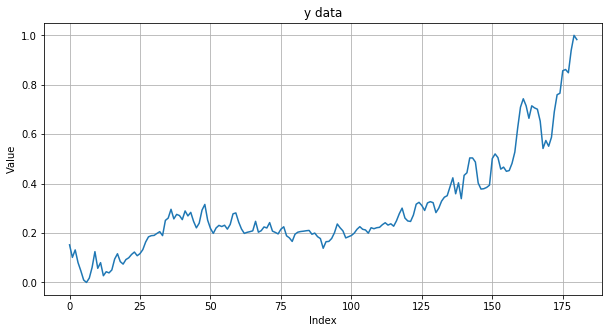

In [82]:
plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.plot(y)  # 데이터를 그래프에 그림
plt.title("y data")  # 그래프 제목 설정
plt.xlabel("Index")  # x축 레이블 설정
plt.ylabel("Value")  # y축 레이블 설정
plt.grid(True)  # 격자 표시
plt.show() 

In [12]:
#3차원으로 구성
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_final = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([100, 1, 7]) torch.Size([100, 1])
Testing Shape torch.Size([81, 1, 7]) torch.Size([81, 1])


In [13]:
class LSTM(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(LSTM, self).__init__()
    self.num_classes = num_classes #number of classes
    self.num_layers = num_layers #number of layers
    self.input_size = input_size #input size
    self.hidden_size = hidden_size #hidden state
    self.seq_length = seq_length #sequence length
 
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm
    self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
    self.fc = nn.Linear(128, num_classes) #fully connected last layer

    self.relu = nn.ReLU() 

  def forward(self,x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))#internal state   
    # Propagate input through LSTM
    
    x = x.view(x.size(0), 1, self.input_size)
    
    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
   
    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
    out = self.relu(hn)
    out = self.fc_1(out) #first Dense
    out = self.relu(out) #relu
    out = self.fc(out) #Final Output
   
    return out 

In [14]:
num_epochs = 5000 #1000 epochs
learning_rate = 0.00001 #0.001 lr

input_size = 7 # number of features
hidden_size = 2 # number of features in hidden state
num_layers = 1 # number of stacked lstm layers
num_classes = 1 # number of output classes

lstm = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1])

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)  # adam optimizer

In [15]:
for epoch in range(num_epochs):
  outputs = lstm.forward(X_train_tensors_final) 
  optimizer.zero_grad()
  loss = loss_function(outputs, y_train_tensors)
  loss.backward() 
 
  optimizer.step() 
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.08577
Epoch: 100, loss: 0.07234
Epoch: 200, loss: 0.06066
Epoch: 300, loss: 0.05059
Epoch: 400, loss: 0.04199
Epoch: 500, loss: 0.03471
Epoch: 600, loss: 0.02862
Epoch: 700, loss: 0.02358
Epoch: 800, loss: 0.01947
Epoch: 900, loss: 0.01616
Epoch: 1000, loss: 0.01353
Epoch: 1100, loss: 0.01148
Epoch: 1200, loss: 0.00989
Epoch: 1300, loss: 0.00868
Epoch: 1400, loss: 0.00778
Epoch: 1500, loss: 0.00711
Epoch: 1600, loss: 0.00661
Epoch: 1700, loss: 0.00625
Epoch: 1800, loss: 0.00598
Epoch: 1900, loss: 0.00578
Epoch: 2000, loss: 0.00563
Epoch: 2100, loss: 0.00551
Epoch: 2200, loss: 0.00542
Epoch: 2300, loss: 0.00534
Epoch: 2400, loss: 0.00527
Epoch: 2500, loss: 0.00520
Epoch: 2600, loss: 0.00514
Epoch: 2700, loss: 0.00509
Epoch: 2800, loss: 0.00503
Epoch: 2900, loss: 0.00498
Epoch: 3000, loss: 0.00492
Epoch: 3100, loss: 0.00487
Epoch: 3200, loss: 0.00482
Epoch: 3300, loss: 0.00477
Epoch: 3400, loss: 0.00472
Epoch: 3500, loss: 0.00467
Epoch: 3600, loss: 0.00462
Epoch: 3700, 

In [16]:
df_X_ss = ss.transform(X)
df_y_mm = mm.transform(y)

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))

In [21]:
X = torch.Tensor(X_train_tensors_final)
y = torch.Tensor(y_train_tensors)

# 데이터의 형태 확인
print("X의 형태:", X.shape)
print("y의 형태:", y.shape)

X의 형태: torch.Size([100, 1, 6])
y의 형태: torch.Size([100, 1])


In [22]:
y_train_tensors = y_train_tensors.reshape(-1, 1)
X_train_tensors_final = X_train_tensors_final.reshape(-1, X_train_tensors_final.shape[-1])

X = torch.Tensor(X_train_tensors_final)
y = torch.Tensor(y_train_tensors)

# 데이터의 형태 확인
print("X의 형태:", X.shape)
print("y의 형태:", y.shape)

X의 형태: torch.Size([100, 6])
y의 형태: torch.Size([100, 1])


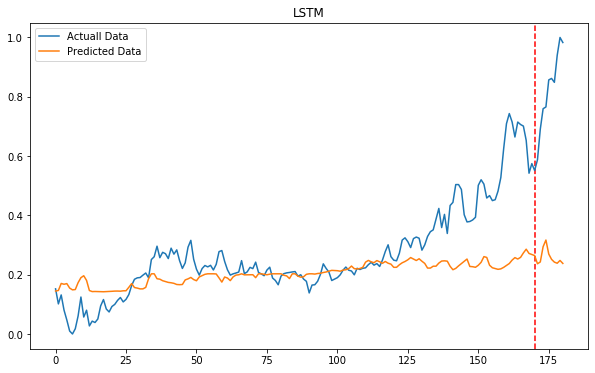

In [19]:
#예측 그래프
train_predict = lstm(df_X_ss)#forward pass
predict = train_predict.data.numpy() #.detach().cpu()
dataY_plot = df_y_mm.data.numpy()

predict = mm.inverse_transform(predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6))
plt.axvline(x=170, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(predict, label='Predicted Data') #predicted plot
plt.title('LSTM')
plt.legend()
plt.savefig('서울_LSTM.png', dpi=200)
plt.show() 

In [18]:
plt.show() 

In [62]:
y_test=dataY_plot
y_pred=predict


In [59]:
y_pred

array([[0.12216136],
       [0.11094991],
       [0.12268376],
       [0.1136309 ],
       [0.11541043],
       [0.11659632],
       [0.119935  ],
       [0.12477903],
       [0.13068241],
       [0.14688408],
       [0.15951076],
       [0.13324201],
       [0.13236386],
       [0.14508003],
       [0.14773294],
       [0.15353599],
       [0.15715212],
       [0.1621725 ],
       [0.16210195],
       [0.16705516],
       [0.17124203],
       [0.18051323],
       [0.18834974],
       [0.19306055],
       [0.19098978],
       [0.1922297 ],
       [0.19352856],
       [0.19622964],
       [0.1951051 ],
       [0.19334868],
       [0.19537073],
       [0.20061406],
       [0.2057347 ],
       [0.22406864],
       [0.27478355],
       [0.28051907],
       [0.22045961],
       [0.1951957 ],
       [0.17638335],
       [0.1561454 ],
       [0.1523807 ],
       [0.14850356],
       [0.15215343],
       [0.16697642],
       [0.16198502],
       [0.1630354 ],
       [0.16881749],
       [0.171

In [60]:
y_test

array([[0.15216504],
       [0.10140932],
       [0.13163806],
       [0.08047386],
       [0.04697713],
       [0.00990605],
       [0.        ],
       [0.01766748],
       [0.06086601],
       [0.1245915 ],
       [0.05718954],
       [0.08016749],
       [0.02716503],
       [0.04330065],
       [0.03870507],
       [0.05055147],
       [0.09466912],
       [0.1161152 ],
       [0.08425245],
       [0.07424428],
       [0.09262663],
       [0.09977533],
       [0.11325572],
       [0.12295751],
       [0.10814951],
       [0.11672794],
       [0.13296568],
       [0.16360295],
       [0.18443628],
       [0.18933824],
       [0.19035947],
       [0.19832516],
       [0.20557597],
       [0.18954249],
       [0.25112337],
       [0.2605188 ],
       [0.296058  ],
       [0.25725082],
       [0.27542892],
       [0.2707312 ],
       [0.2542892 ],
       [0.28941995],
       [0.26919934],
       [0.28359887],
       [0.24734478],
       [0.22099674],
       [0.23988971],
       [0.292

In [44]:
#예측 성능 지표
y_pred = pd.DataFrame(train_predict[:, 0])
y_test = all.data.loc['APT'][0:len(train_predict)]
y_test.reset_index(drop=True, inplace=True)

AttributeError: 'builtin_function_or_method' object has no attribute 'data'

In [61]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
    mean_squared_log_error, r2_score

def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    
    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE, RMSE, MSLE, RMSLE, R2],
                         index=['MAE', 'RMSE', 'MSLE', 'RMSLE', 'R2'],
                         columns=['Results'])
    return Result

# 예시 데이터 (y_test와 y_pred는 NumPy 배열)


result_df = confirm_result(y_test, y_pred)
print(result_df)


       Results
MAE    0.13895
RMSE   0.22550
MSLE   0.02538
RMSLE  0.15930
R2    -0.28966


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,
mean_squared_log_error, r2_score

def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqtr(mean_absolute_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqtr(mean_squared_log_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    
    pd.options.display.float_format = '{:.5f}',format
    Result = pd.DataFrame(data=[MAE, RMSE, RMSLE, R2],
                         columns=['Results'])
    return Result

confirm_result(y_test, y_pred)

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-55-aa7e33f8afd8>, line 1)